In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4323.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4262.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4788.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4657.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4387.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4255.jpg
/kaggle/

In [80]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.config.set_visible_devices(tf.config.list_physical_devices('GPU'), 'GPU')
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
tf.__version__

'2.16.1'

In [88]:
train_datagren=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

train_dataset=train_datagren.flow_from_directory("/kaggle/input/cat-and-dog/training_set/training_set",
                                            target_size=(64,64),
                                            batch_size=32,
                                            class_mode="binary")

Found 8005 images belonging to 2 classes.


In [89]:
test_datagren=ImageDataGenerator(rescale=1./255)

test_dataset=train_datagren.flow_from_directory("/kaggle/input/cat-and-dog/test_set/test_set",
                                            target_size=(64,64),
                                            batch_size=32,
                                            class_mode="binary")

Found 2023 images belonging to 2 classes.


## Model

In [68]:
cnn=tf.keras.models.Sequential()

In [69]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu",input_shape=[64,64,3]))

In [70]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [71]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [72]:
cnn.add(tf.keras.layers.Flatten())

In [73]:
cnn.add(tf.keras.layers.Dense(units=128,activation="relu"))

In [74]:
cnn.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [75]:
cnn.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [76]:
cnn.fit(x=train_dataset,validation_data=test_dataset,epochs=50)

Epoch 1/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 32s 120ms/step - accuracy: 0.5525 - loss: 0.6914 - val_accuracy: 0.6006 - val_loss: 0.6647
Epoch 2/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 29s 114ms/step - accuracy: 0.6261 - loss: 0.6469 - val_accuracy: 0.6540 - val_loss: 0.6287
Epoch 3/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 30s 117ms/step - accuracy: 0.6750 - loss: 0.6041 - val_accuracy: 0.6797 - val_loss: 0.6006
Epoch 4/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 29s 114ms/step - accuracy: 0.7024 - loss: 0.5734 - val_accuracy: 0.7084 - val_loss: 0.5745
Epoch 5/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 30s 115ms/step - accuracy: 0.7141 - loss: 0.5527 - val_accuracy: 0.7128 - val_loss: 0.5452
Epoch 6/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 29s 113ms/step - accuracy: 0.7361 - loss: 0.5323 - val_accuracy: 0.7509 - val_loss: 0.5236
Epoch 7/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 29s 115ms/step - accuracy: 0.7562 - loss: 0.4901 - val_accuracy: 0.7558 - val_loss: 0.5070
Epoch 8/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 29s 114ms/step - accuracy: 0.7733 - loss: 0

In [82]:
test_dataset.class_indices.keys()

dict_keys(['cats', 'dogs'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


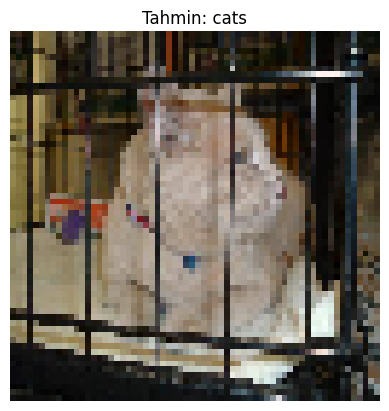

In [93]:
cat_image_path = '/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4008.jpg'

# Resmi yükleme ve işleme
test_image = tf.keras.preprocessing.image.load_img(cat_image_path, target_size=(64, 64))
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Model ile tahmin yapma
result = cnn.predict(test_image)

# Sınıf indekslerini alma
classes = train_dataset.class_indices
class_names = list(classes.keys())

# Tahmin edilen sınıfı bulma
predicted_class = class_names[np.argmax(result)]

img = tf.keras.preprocessing.image.load_img(cat_image_path, target_size=(64, 64))
plt.imshow(img)
plt.title(f'Tahmin: {predicted_class}')
plt.axis('off') 
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


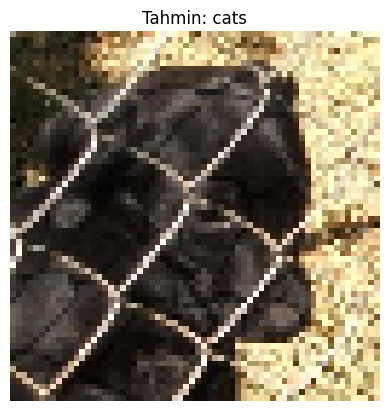

In [97]:
dog_image_path = '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4013.jpg'

# Resmi yükleme ve işleme
test_image = tf.keras.preprocessing.image.load_img(dog_image_path, target_size=(64, 64))
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Model ile tahmin yapma
result = cnn.predict(test_image)

# Sınıf indekslerini alma
classes = train_dataset.class_indices
class_names = list(classes.keys())

# Tahmin edilen sınıfı bulma
predicted_class = class_names[np.argmax(result)]

img = tf.keras.preprocessing.image.load_img(dog_image_path, target_size=(64, 64))
plt.imshow(img)
plt.title(f'Tahmin: {predicted_class}')
plt.axis('off')  
plt.show()